In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.cluster  import KMeans
from sklearn.preprocessing  import StandardScaler

In [20]:
# Load the dataset
df = pd.read_csv("/content/iris (1).csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
X  = df.iloc[:,  1:-1]

In [16]:
scaler  = StandardScaler()
X_scaled  = scaler.fit_transform(X)

In [17]:
inertia  = []
for k in range(1, 11):
  kmeans  = KMeans(n_clusters=k,  random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)


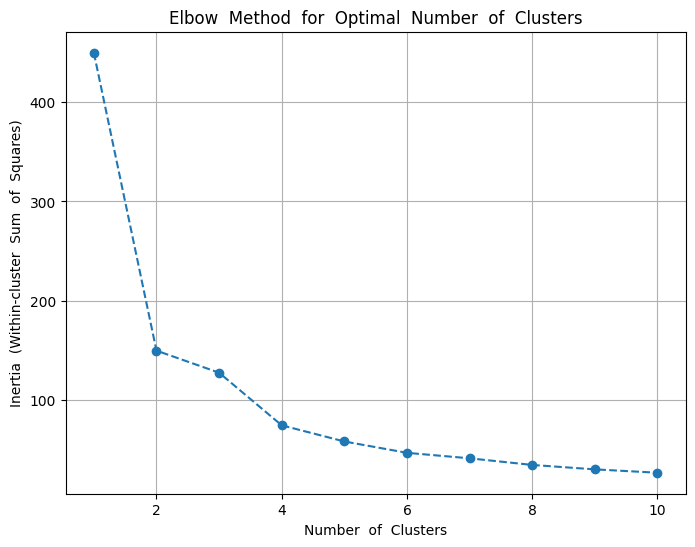

In [18]:
plt.figure(figsize=(8,  6))
plt.plot(range(1,  11),  inertia,  marker='o',  linestyle='--')
plt.xlabel('Number  of  Clusters')
plt.ylabel('Inertia  (Within-cluster  Sum  of  Squares)')
plt.title('Elbow  Method  for  Optimal  Number  of  Clusters')
plt.grid()
plt.show()

In [25]:
# Fit KMeans with the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add the cluster labels to the original data for analysis
data['Cluster'] = clusters
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


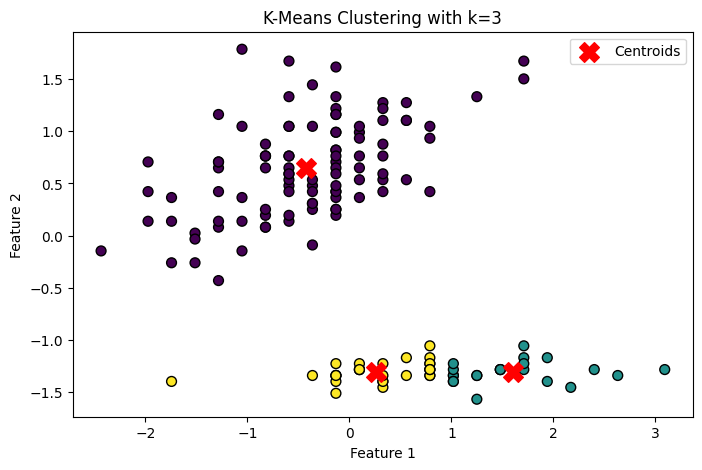

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.show()

